
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)



<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**

- **Input Layer:** 

- **Hidden Layer:** 

- **Output Layer:**

- **Activation:** 

Neuron: The Nodes of a Neural Network. These represent the values after a calculation is made depending on the weights that procede it and then pass the sum of those calculations to the next layer.

Input Layer:The first layer of a nueral network. These represent the values before any weights are caluculated. This layer requires an input dimension.


Hidden Layer:The layers between the input layer and the output layer. there is at least one hidden layer and can be as many as designated by the creator of the network.


Output Layer:This layer represents the finalized value of the calculations performed after the input layer and by each of the hidden layers. The amount of Neurons here should match the amount of classes in a multiclassification model (softfmax) and as few as one in a binarey classifiaction model(sigmoid)


Activation Function: The function that determines the output of a nueron, such as sigmoid (0-off, 1-on), reLU, leaky reLU, tanf, and softmax.

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

The process of sending input all the way through a neraul network, deciding how bad the resulting predicted answers made by the network are, and then going backwards through and making the adjustments that would make those predictions better, over and over again until we get predictions that are as best as we can possibly get, is called 'back propagation'.


Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.


The input is taken into the network, multiplied by the weights as determined by the activation function and sent to each connected neuron in the hiddenlayer. Those neurons sum all of the resulting values, and any bias that is required by the network architecture and pass them to the output layer determined by the activation function with that neuron's associated weights. If there are multiple nerons in the output layer, the highest score wins the prediction. if there is just one, it will result in the output either being 'on', or 'off'.




<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [51]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [52]:
X.shape, y.shape

((300, 2), (300,))

### Simple Perceptron
Construct a simple perceptron using Keras. 

You model should have `1 dense layer` with a `single neuron` and a `sigmoid activation function`. 


Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [53]:
#import tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# build and fit model

# YOUR CODE HERE

model1 = tf.keras.Sequential([Dense(1, activation='sigmoid')])

model1.compile(loss='binary_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

h1 = model1.fit(X, y, 
          epochs=10,
          validation_split=0.2 
          )

Epoch 1/10
8/8 [==============================] - 0s 21ms/step - loss: 0.8425 - accuracy: 0.5766 - val_loss: 1.0521 - val_accuracy: 0.3833
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 0.8277 - accuracy: 0.5890 - val_loss: 1.0467 - val_accuracy: 0.3833
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 0.8136 - accuracy: 0.6068 - val_loss: 1.0415 - val_accuracy: 0.3833
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 0.8164 - accuracy: 0.6184 - val_loss: 1.0363 - val_accuracy: 0.3833
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8427 - accuracy: 0.5570 - val_loss: 1.0311 - val_accuracy: 0.4000
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8290 - accuracy: 0.5873 - val_loss: 1.0261 - val_accuracy: 0.4000
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8445 - accuracy: 0.5695 - val_loss: 1.0211 - val_accuracy: 0.4000
Epoch 8/10
8/8 [=================

In [54]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [55]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- `2` Hidden Layers
- `5-32` Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [56]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [57]:
# build and fit model

# YOUR CODE HERE
model2 = tf.keras.Sequential([
      Dense(32, activation='relu'),
      Dense(16, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

model2.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

h2 = model2.fit(X, y, 
          epochs=100, 
          validation_split=0.2,
          callbacks=[myCallback()])

Epoch 1/100
8/8 [==============================] - 0s 21ms/step - loss: 0.6774 - accuracy: 0.6140 - val_loss: 0.6554 - val_accuracy: 0.7333
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6515 - accuracy: 0.8361 - val_loss: 0.6315 - val_accuracy: 0.8667
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6200 - accuracy: 0.9408 - val_loss: 0.6084 - val_accuracy: 0.9000
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5937 - accuracy: 0.9781 - val_loss: 0.5873 - val_accuracy: 0.9167
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5784 - accuracy: 0.9549 - val_loss: 0.5680 - val_accuracy: 0.9167
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5498 - accuracy: 0.9480 - val_loss: 0.5502 - val_accuracy: 0.9167
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5375 - accuracy: 0.9447 - val_loss: 0.5330 - val_accuracy: 0.9167
Epoch 8/100
8/8 [=========

In [58]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [59]:
!pip install mlxtend 

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


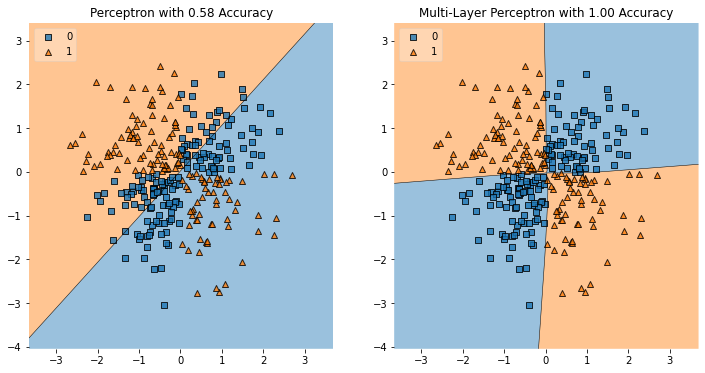

In [60]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?


In model1 the data can only be split into on one category or the other by one calculation. There is no single linear separation of the data that can possibly contain only the correct labels. the model does its best to get the least amount of loss (the fewest errors) but a single sigmoid function cannot classify the data at a higher rate given this dataset.

With multiple layers, the second model does a perfect job of determining wich class the data should fall into.

If (x < 0 AND y < 0) OR (x > 0 AND y > 0), the point usually fits into category 0.

If (x < 0 AND y > 0) OR (x > 0 AND y < 0), the point usually fits into category 1.

Non-linear separation would be useful in image recognition with even more layers because the color, saturation, position, and relational postion of each pixel could all determine wether a colection of pixels represents a certain type of image or not.


## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyperparameter tune two parameters each with no more than 3 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. 
    - **Use `n_jobs` = 1**
- When hyperparameter tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [62]:
# Create an input matrix named 'X' store it in a 2D numpy array

# Create an output vector for the labels named 'Y', store it in 1D numpy array

# YOUR CODE HERE
from sklearn.model_selection import train_test_split
#Splitting the data
X = df[df.columns.drop('target')]
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20,
    stratify= Y,
    random_state=17)

In [63]:

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [64]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [65]:
# Imports to add GridSearch and the classifier

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import os

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [66]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier
# YOUR CODE HERE
scaler = StandardScaler()
X_train_fit = scaler.fit_transform(X_train)
X_test_fit = scaler.fit_transform(X_test)

#create the model
tf.random.set_seed(17)
logdir = os.path.join("logs", "EarlyStopping-Loss")

stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)


model = tf.keras.Sequential([
    Dense(128, activation='relu', input_dim= 13),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_73 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_74 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [68]:

#baseline fit
model.fit(X_train_fit, Y_train, epochs=72, 
          validation_data=(X_test_fit,Y_test),
          callbacks=[myCallback(), stop])

Epoch 1/72
8/8 [==============================] - 1s 23ms/step - loss: 0.6709 - accuracy: 0.5914 - val_loss: 0.5845 - val_accuracy: 0.8033
Epoch 2/72
8/8 [==============================] - 0s 7ms/step - loss: 0.5523 - accuracy: 0.7979 - val_loss: 0.4995 - val_accuracy: 0.8361
Epoch 3/72
8/8 [==============================] - 0s 6ms/step - loss: 0.4565 - accuracy: 0.8476 - val_loss: 0.4256 - val_accuracy: 0.7869
Epoch 4/72
8/8 [==============================] - 0s 6ms/step - loss: 0.3814 - accuracy: 0.8439 - val_loss: 0.3807 - val_accuracy: 0.8525
Epoch 5/72
8/8 [==============================] - 0s 6ms/step - loss: 0.3414 - accuracy: 0.8558 - val_loss: 0.3492 - val_accuracy: 0.8689
Epoch 6/72
8/8 [==============================] - 0s 7ms/step - loss: 0.3651 - accuracy: 0.8459 - val_loss: 0.3440 - val_accuracy: 0.8689
Epoch 7/72
8/8 [==============================] - 0s 6ms/step - loss: 0.3080 - accuracy: 0.8724 - val_loss: 0.3396 - val_accuracy: 0.8689
Epoch 8/72
8/8 [=================

In [69]:
model.evaluate(X_train_fit, Y_train)

8/8 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9256


[0.19803255796432495, 0.9256198406219482]

In [70]:

# Function to create model, required for KerasClassifier
def create_model(units=16):
    # create model
    model = tf.keras.Sequential()
    model.add(Dense(units, input_dim=13, activation='relu'))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [71]:
type(create_model())

tensorflow.python.keras.engine.sequential.Sequential

In [72]:
# Visible Testing
assert create_model().__module__ == 'tensorflow.python.keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

In [73]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
# YOUR CODE HERE
model = KerasClassifier(build_fn=create_model, verbose=1)

In [74]:
# Visible Testing
assert model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [75]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with no more than 3 possible values for each 

# YOUR CODE HERE
param_grid = {'batch_size': [32],
              'epochs': [20]
              }

In [76]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [77]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
# YOUR CODE HERE

gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = gs.fit(X_train_fit, Y_train)

Epoch 1/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5391
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6042
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6719
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6287 - accuracy: 0.7129
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.7083
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6125 - accuracy: 0.7126
Epoch 7/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5825 - accuracy: 0.7440
Epoch 8/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5639 - accuracy: 0.7527
Epoch 9/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.7602
Epoch 10/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7864
Epoch 11/20
7/7 [======================

In [78]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.7311224579811096 using {'batch_size': 32, 'epochs': 20}
Means: 0.7311224579811096, Stdev: 0.06780875892133999 with: {'batch_size': 32, 'epochs': 20}
